<a href="https://colab.research.google.com/github/federico-bassi/EtricsIII/blob/main/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometric III - Assignment 1


### **Import**

In [ ]:
#Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from google.colab import drive
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.tsa.ar_model import AutoReg
import seaborn as sns
from scipy import stats


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load dataset
data = pd.read_csv("/content/drive/MyDrive/EtricsIII_Ass/Data/data_assign_p1.csv")

In [ ]:
data.head()

,obs,GDP_QGR
0,1987Q2,2.740482
1,1987Q3,2.027536
2,1987Q4,0.798372
3,1988Q1,0.990361
4,1988Q2,0.339641


In [ ]:
data.tail()

,obs,GDP_QGR
83,2008Q1,1.463090
84,2008Q2,0.256876
85,2008Q3,0.497846
86,2008Q4,-0.311434
87,2009Q1,-2.705085


### **Point 1**

PermissionError: [Errno 1] Operation not permitted: '/content/drive/MyDrive/EtricsIII_Ass/Figures/growth_rate.png'

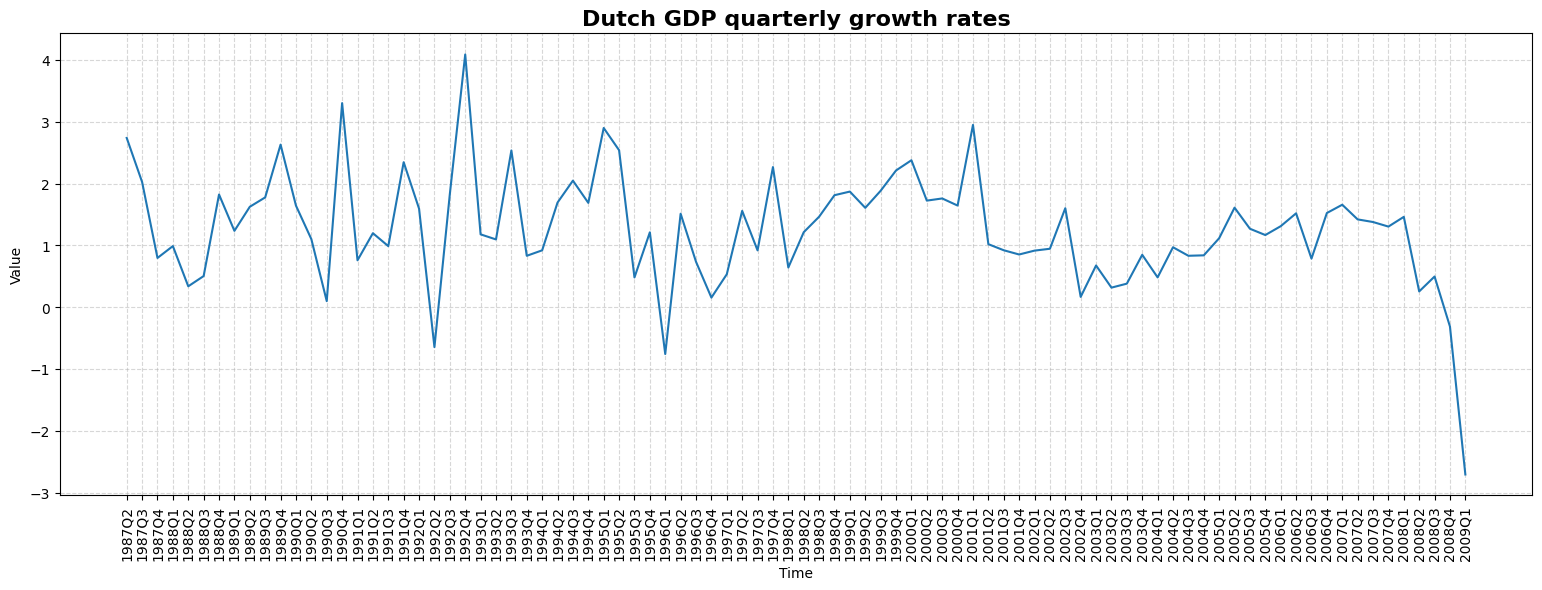

In [ ]:
## https://campus.datacamp.com/courses/arima-models-in-python/the-best-of-the-best-models?ex=1

#Plot Dutch GDP quarterly growth rates
plt.figure(figsize=(19, 6))

plt.plot(data['obs'], data['GDP_QGR'])
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and axis labels
plt.title('Dutch GDP quarterly growth rates', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/growth_rate.png")
plt.show()

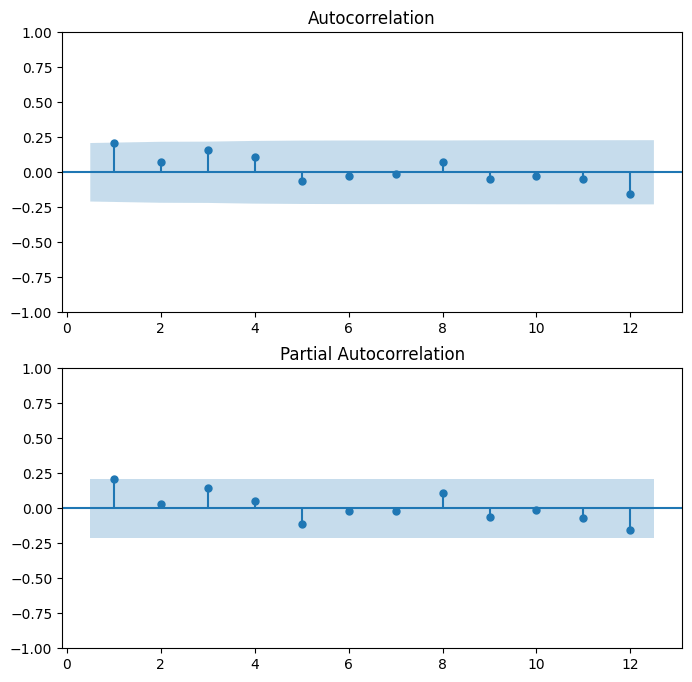

In [ ]:
#ACF and PACF
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(data["GDP_QGR"], lags=12, zero=False, ax=ax1)
plot_pacf(data["GDP_QGR"], lags=12, zero=False, ax=ax2)
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/acf.png")
plt.show()

### **Point 2**

In [ ]:
#Estimate AR(4) model
ar_4_result = sm.tsa.AutoReg(data["GDP_QGR"], 4).fit()
print(ar_4_result.summary())

                            AutoReg Model Results                             
Dep. Variable:                GDP_QGR   No. Observations:                   88
Model:                     AutoReg(4)   Log Likelihood                -107.979
Method:               Conditional MLE   S.D. of innovations              0.875
Date:                Thu, 28 Mar 2024   AIC                            227.958
Time:                        16:17:36   BIC                            242.543
Sample:                             4   HQIC                           233.821
                                   88                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4789      0.290      1.651      0.099      -0.090       1.048
GDP_QGR.L1     0.2322      0.120      1.936      0.053      -0.003       0.467
GDP_QGR.L2     0.0551      0.122      0.451      0.6

In [ ]:
#Estimate AR(3) model
ar_3_result = sm.tsa.AutoReg(data["GDP_QGR"], [1,2,3]).fit()
print(ar_3_result.summary())

                            AutoReg Model Results                             
Dep. Variable:                GDP_QGR   No. Observations:                   88
Model:                     AutoReg(3)   Log Likelihood                -109.203
Method:               Conditional MLE   S.D. of innovations              0.874
Date:                Thu, 28 Mar 2024   AIC                            228.406
Time:                        16:17:36   BIC                            240.619
Sample:                             3   HQIC                           233.318
                                   88                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5866      0.260      2.253      0.024       0.076       1.097
GDP_QGR.L1     0.2506      0.118      2.120      0.034       0.019       0.482
GDP_QGR.L2     0.0469      0.122      0.386      0.7

In [ ]:
#Estimate AR(2) model
ar_2_result = sm.tsa.AutoReg(data["GDP_QGR"], [1,2]).fit()
print(ar_2_result.summary())

                            AutoReg Model Results                             
Dep. Variable:                GDP_QGR   No. Observations:                   88
Model:                     AutoReg(2)   Log Likelihood                -111.777
Method:               Conditional MLE   S.D. of innovations              0.888
Date:                Thu, 28 Mar 2024   AIC                            231.554
Time:                        16:17:36   BIC                            241.372
Sample:                             2   HQIC                           235.505
                                   88                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8395      0.225      3.735      0.000       0.399       1.280
GDP_QGR.L1     0.2477      0.120      2.070      0.038       0.013       0.482
GDP_QGR.L2     0.0583      0.120      0.485      0.6

In [ ]:
#Estimate AR(1) model
ar_1_result = sm.tsa.AutoReg(data["GDP_QGR"], [1]).fit()
print(ar_1_result.summary())

                            AutoReg Model Results                             
Dep. Variable:                GDP_QGR   No. Observations:                   88
Model:                     AutoReg(1)   Log Likelihood                -112.799
Method:               Conditional MLE   S.D. of innovations              0.885
Date:                Fri, 29 Mar 2024   AIC                            231.599
Time:                        10:22:04   BIC                            238.996
Sample:                             1   HQIC                           234.577
                                   88                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8962      0.179      5.018      0.000       0.546       1.246
GDP_QGR.L1     0.2674      0.116      2.313      0.021       0.041       0.494
                                    Roots           

In [ ]:
#View coefficients AR(1)
ar_1_result.params

const         0.896161
GDP_QGR.L1    0.267446
dtype: float64

In [ ]:
res = summary_col([ar_1_result],stars=True,float_format='%0.2f')

f = open('/content/drive/MyDrive/ar_estimation.tex', 'w')
#f.write(beginningtex)
f.write(res.as_latex())
#f.write(endtex)
f.close()

In [ ]:
#Store AIC results for each model
aic = [ar_1_result.aic, ar_2_result.aic, ar_3_result.aic, ar_4_result.aic]

NameError: name 'ar_2_result' is not defined

In [ ]:
#Create graph of AIC results
aic = [ar_1_result.aic, ar_2_result.aic, ar_3_result.aic, ar_4_result.aic]
num_models = len(aic)
ar_orders = range(1, num_models + 1)
plt.figure(figsize=(8, 6))
plt.plot(ar_orders, aic, marker='o', linestyle='-')
plt.title('AIC for AR Models', fontsize=16, fontweight='bold')  # Setting title properties
plt.xlabel('AR Order')
plt.ylabel('AIC')
plt.xticks(ar_orders)
plt.grid(True)
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/AIC")
plt.show()

NameError: name 'ar_2_result' is not defined

### **Point 3**

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/EconometricsIII/residuals_acf.png'

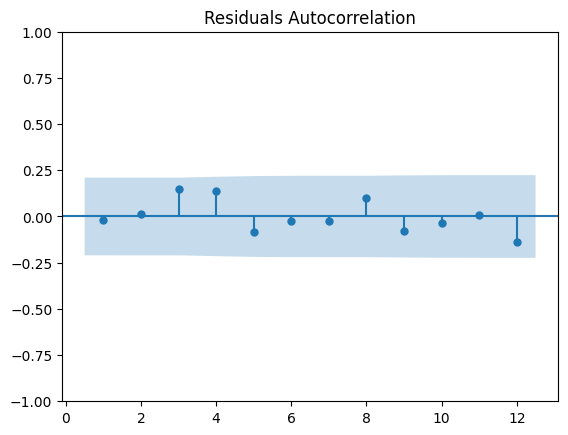

In [ ]:
#Plot Residuals Autocorrelation
plot_acf(ar_1_result.resid, lags=12, zero=False)
plt.title("Residuals Autocorrelation")
plt.savefig("/content/drive/EconometricsIII/residuals_acf.png")
plt.show()

### **Point 4**

In [ ]:
#Forecast next 8 datapoints using AR(1) model
predictions = ar_1_result.predict(start=88, end=95)
print(predictions)

88    0.172697
89    0.942348
90    1.148188
91    1.203239
92    1.217962
93    1.221899
94    1.222952
95    1.223234
dtype: float64


In [ ]:
#View coefficients AR(1) model
ar_1_result.params

const         0.896161
GDP_QGR.L1    0.267446
dtype: float64

In [ ]:
#Store coefficient estimates
X_t = data.iloc[-1]["GDP_QGR"]
phi = ar_1_result.params["GDP_QGR.L1"]
alpha = ar_1_result.params["const"]

In [ ]:
#We manually create forecasts too, to check the predictions made by the package
k_values = range(1, 9)
expected_values = []
for k in k_values:
    expectation = sum(phi ** i * alpha for i in range(k)) + (phi ** k) * X_t
    expected_values.append(expectation)

for k, expectation in zip(k_values, expected_values):
    print(f"k = {k}: {expectation}")

k = 1: 0.17269746085052906
k = 2: 0.9423479191979385
k = 3: 1.1481875888394695
k = 4: 1.2032385137607788
k = 5: 1.2179616443408532
k = 6: 1.221899281617389
k = 7: 1.222952385591251
k = 8: 1.223234033671528


In [ ]:
# Print dataframe to latex
time_periods = ["2009Q2", "2009Q3", "2009Q4", "2010Q1", "2010Q2", "2010Q3", "2010Q4", "2011Q1"]
d={"obs": time_periods, "GDP_QGR": expected_values}
df = pd.DataFrame(data=d)
print(df)
df.to_latex("/content/drive/MyDrive/EtricsIII_Ass/Tables/predictions1d.tex", index=False)

      obs   GDP_QGR
0  2009Q2  0.172697
1  2009Q3  0.942348
2  2009Q4  1.148188
3  2010Q1  1.203239
4  2010Q2  1.217962
5  2010Q3  1.221899
6  2010Q4  1.222952
7  2011Q1  1.223234


<ipython-input-19-8f68fb45c695>:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("/content/drive/MyDrive/EtricsIII_Ass/Tables/predictions1d.tex", index=False)


PermissionError: [Errno 1] Operation not permitted: '/content/drive/MyDrive/EtricsIII_Ass/Tables/predictions1d.tex'

### Point 5

In [ ]:
# Retrieve model parameters
ar_1_result.cov_params
phi = ar_1_result.params["GDP_QGR.L1"]
sigma2 = ar_1_result.sigma2

In [ ]:
sigma2
phi

0.2674456532950153

In [ ]:
#Compute the variance of the forecast
variance = []
for i in range(1, 9):
  if i==1:
    variance.append(sigma2)
  else:
    variance.append(variance[i-2]+ sigma2*phi**(2*(i-1)))

In [ ]:
variance

[0.782869221598905,
 0.8388656473451904,
 0.8428709136270289,
 0.8431573990191702,
 0.8431778905106554,
 0.8431793562092034,
 0.8431794610464836,
 0.8431794685451983]

In [ ]:
#Compute confidence intervals
confidence_intervals_upper = [expected_values[i] + 1.96 * np.sqrt(variance[i]) for i in range(len(expected_values))]
confidence_intervals_lower = [expected_values[i] - 1.96 * np.sqrt(variance[i]) for i in range(len(expected_values))]

PermissionError: [Errno 1] Operation not permitted: '/content/drive/MyDrive/EtricsIII_Ass/Figures/growth_rate_with_forecasts.png'

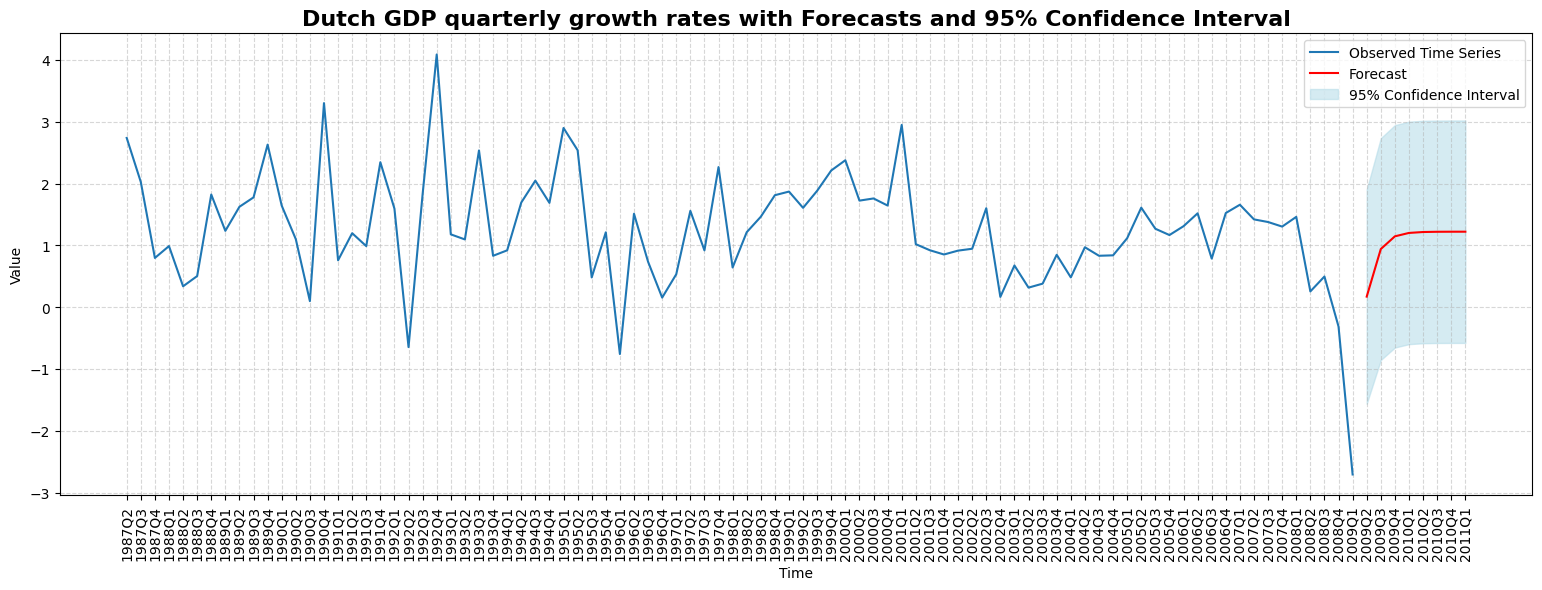

In [ ]:
#Plot Confidence Intervals

plt.figure(figsize=(19, 6))

#Plot the original data
plt.plot(data['obs'], data['GDP_QGR'], label='Observed Time Series')

#Plot the forecasts
plt.plot(df["obs"], df["GDP_QGR"], color='red', label='Forecast')

#Calculate upper and lower bounds of confidence intervals
confidence_intervals_upper = [expected_values[i] + 1.96 * np.sqrt(variance[i]) for i in range(len(expected_values))]
confidence_intervals_lower = [expected_values[i] - 1.96 * np.sqrt(variance[i]) for i in range(len(expected_values))]

#Fill between the upper and lower confidence intervals
plt.fill_between(df["obs"], confidence_intervals_lower, confidence_intervals_upper, color='lightblue', alpha=0.5, label='95% Confidence Interval')

#Add grid, title, labels, legend, and save/show the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Dutch GDP quarterly growth rates with Forecasts and 95% Confidence Interval', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/growth_rate_with_forecasts.png")
plt.show()

In [ ]:
#Build a dataframe with point forecast and confidence intervals
confidence_intervals_upper
rounded_confidence_intervals_upper = [round(val, 3) for val in confidence_intervals_upper]
rounded_confidence_intervals_lower = [round(val, 3) for val in confidence_intervals_lower]
pred_conf_intervals = pd.DataFrame({"Time": time_periods, "GDP_QGR": expected_values, 'Conf. Interval': [[lower, upper] for lower, upper in zip(rounded_confidence_intervals_lower, rounded_confidence_intervals_upper)] })
pred_conf_intervals.to_latex("/content/drive/MyDrive/EtricsIII_Ass/Tables/CI.tex", index=False)

<ipython-input-27-cb767d1a46c5>:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pred_conf_intervals.to_latex("/content/drive/MyDrive/EtricsIII_Ass/Tables/CI.tex", index=False)


PermissionError: [Errno 1] Operation not permitted: '/content/drive/MyDrive/EtricsIII_Ass/Tables/CI.tex'

### Point 6

In [ ]:
#Jarque Bera Test for Normality of innovations
stats.jarque_bera(ar_1_result.resid)

SignificanceResult(statistic=29.96766871077049, pvalue=3.1088761538862436e-07)

In [ ]:
len(data)

88

### Point 7

In [ ]:
#Load in provided observed datapoints
new_data = {
    "obs": ["2009Q2", "2009Q3", "2009Q4", "2010Q1", "2010Q2", "2010Q3", "2010Q4", "2011Q1"],
    "GDP_QGR": [-1.63, 0.28, 0.33, 0.66, 1.59, 0.51, 0.71, 0.81]
}

new_data_df = pd.DataFrame(new_data)
data = pd.concat([data, new_data_df], ignore_index=True)
print(data)

       obs   GDP_QGR
0   1987Q2  2.740482
1   1987Q3  2.027536
2   1987Q4  0.798372
3   1988Q1  0.990361
4   1988Q2  0.339641
..     ...       ...
91  2010Q1  0.660000
92  2010Q2  1.590000
93  2010Q3  0.510000
94  2010Q4  0.710000
95  2011Q1  0.810000

[96 rows x 2 columns]


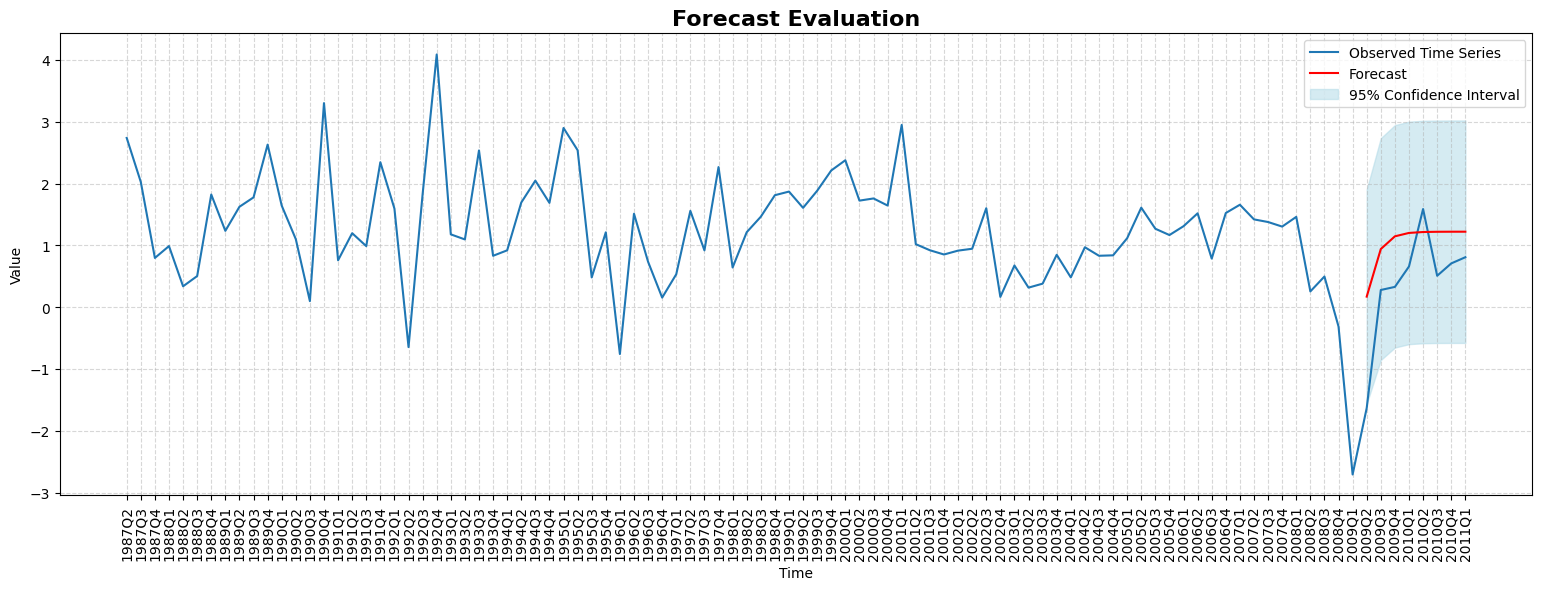

In [ ]:
plt.figure(figsize=(19, 6))

#Plot the original data
plt.plot(data['obs'], data['GDP_QGR'], label='Observed Time Series')

#Plot the forecasts
plt.plot(df["obs"], df["GDP_QGR"], color='red', label='Forecast')

#Calculate upper and lower bounds of confidence intervals
confidence_intervals_upper = [expected_values[i] + 1.96 * np.sqrt(variance[i]) for i in range(len(expected_values))]
confidence_intervals_lower = [expected_values[i] - 1.96 * np.sqrt(variance[i]) for i in range(len(expected_values))]

#Fill between the upper and lower confidence intervals
plt.fill_between(df["obs"], confidence_intervals_lower, confidence_intervals_upper, color='lightblue', alpha=0.5, label='95% Confidence Interval')

#Add grid, title, labels, legend, and save/show the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Forecast Evaluation', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("/content/drive/MyDrive/EtricsIII_Ass/Figures/forecast_comparison.png")
plt.show()